<a href="https://colab.research.google.com/github/Chukwugude/Machine-Learning-projects/blob/main/CNN_for_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D,MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [ ]:
# Load data
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)


170498071/170498071 [==============================] - 13s 0us/step
x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


In [ ]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [ ]:
# Build model using functional API
i = Input(shape=x_train[0].shape)

# x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
# x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
# x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)

# x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [ ]:
# Compile

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Fit
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)


Epoch 1/50
1563/1563 [==============================] - 22s 9ms/step - loss: 1.2977 - accuracy: 0.5517 - val_loss: 1.1436 - val_accuracy: 0.6167
Epoch 2/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8496 - accuracy: 0.7038 - val_loss: 0.7905 - val_accuracy: 0.7251
Epoch 3/50
1563/1563 [==============================] - 17s 11ms/step - loss: 0.6947 - accuracy: 0.7607 - val_loss: 0.8292 - val_accuracy: 0.7362
Epoch 4/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.5852 - accuracy: 0.7977 - val_loss: 0.6801 - val_accuracy: 0.7650
Epoch 5/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.5033 - accuracy: 0.8267 - val_loss: 0.7636 - val_accuracy: 0.7613
Epoch 6/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.4257 - accuracy: 0.8528 - val_loss: 0.6016 - val_accuracy: 0.8071
Epoch 7/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.3507 - accuracy: 0.8777 - val_loss: 0.6098 - val_a

In [ ]:
# Fit with data augmentation

batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 38s 24ms/step - loss: 0.5361 - accuracy: 0.8277 - val_loss: 0.4783 - val_accuracy: 0.8423
Epoch 2/50
1562/1562 [==============================] - 38s 24ms/step - loss: 0.4365 - accuracy: 0.8565 - val_loss: 0.4562 - val_accuracy: 0.8527
Epoch 3/50
1562/1562 [==============================] - 37s 24ms/step - loss: 0.4001 - accuracy: 0.8673 - val_loss: 0.4441 - val_accuracy: 0.8586
Epoch 4/50
1562/1562 [==============================] - 37s 24ms/step - loss: 0.3856 - accuracy: 0.8729 - val_loss: 0.4670 - val_accuracy: 0.8497
Epoch 5/50
1562/1562 [==============================] - 38s 25ms/step - loss: 0.3654 - accuracy: 0.8786 - val_loss: 0.4549 - val_accuracy: 0.8494
Epoch 6/50
1562/1562 [==============================] - 37s 23ms/step - loss: 0.3553 - accuracy: 0.8827 - val_loss: 0.4538 - val_accuracy: 0.8587
Epoch 7/50
1562/1562 [==============================] - 37s 24ms/step - loss: 0.3413 - accuracy: 0.8844 - val_loss: 0.4273 -

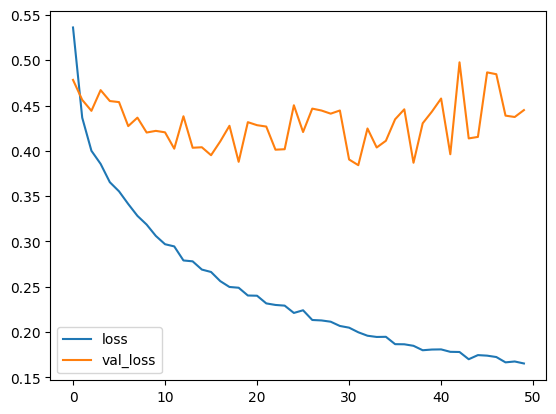

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

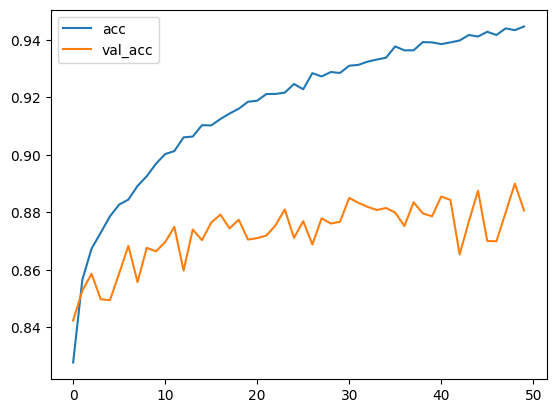

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[930  16  16   3   5   4   1   4  13   8]
 [  4 984   0   0   0   0   1   0   3   8]
 [ 43   7 827  23  24  27  32  14   2   1]
 [ 25   8  25 766  31  76  29  22   8  10]
 [ 10   2  39  22 857  12  34  21   2   1]
 [  7   6  21  95  22 806  12  28   2   1]
 [  5   4  23  29  14   8 907   5   2   3]
 [ 10   1  10  15  16  14   0 932   0   2]
 [ 47  23   5   5   2   1   1   1 906   9]
 [  9  83   3   5   0   1   1   1   6 891]]


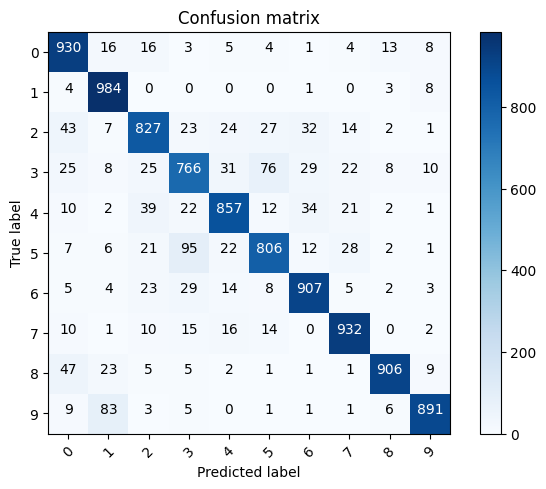

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [ ]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

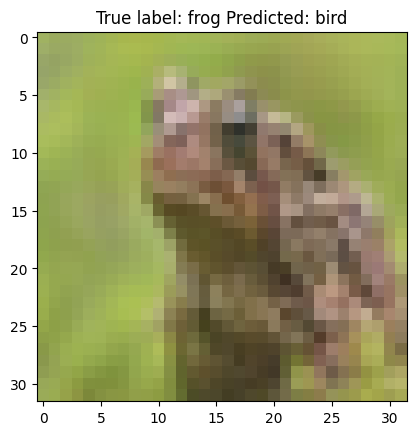

In [ ]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

In [ ]:
# Now that the model is so large, it's useful to summarize it
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0     